In [2]:
import os
from tqdm import tqdm
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
font = {'family' : 'Times New Roman',
        'weight' : 'regular',
        'size'   : 14}

matplotlib.rc('font', **font)

In [4]:
# Load the data
directory = os.getcwd() + r'\data'
filenames = ['AdGame.csv', 'InstallGame.csv', 'PaymentGame.csv']
filepaths = list(map(lambda filename: os.path.join(directory, filename), filenames))
data = list(map(lambda filepath: pd.read_csv(filepath), filepaths))

In [5]:
data[1]

,Install_Time,Country,OS_Version,App_Version,scrs,key_campaign,User_ID,n_unique_payments,iap_net_revenue,ad_net_revenue,...,1d_ad_net_revenue,7d_n_unique_payments,7d_iap_net_revenue,7d_ad_net_revenue,14d_iap_net_revenue,14d_ad_net_revenue,30d_iap_net_revenue,30d_ad_net_revenue,60d_iap_net_revenue,60d_ad_net_revenue
0,2024-03-01 00:00:00,B709,CA78,CA66FA2720A339,B621A37D72EA7AA8FF,B601FF5640CC578EC3D14F55DDC7F4666C,C37AFD3924BA3BFC,0.0,0.0,0.004321,...,0.004321,0.0,0.0,0.004321,0.0,0.004321,0.0,0.004321,0.0,0.004321
1,2024-03-01 00:00:00,B610,CA7A,CA66FA2720A33A,B43AAA6879E46B,B43AAA6879E46B,C37AFD3924BA3BFF,0.0,0.0,0.014281,...,0.014281,0.0,0.0,0.014281,0.0,0.014281,0.0,0.014281,0.0,0.014281
2,2024-03-01 00:00:00,AE09,CA7A,CA66FA2720A339,BA38BD6578FB61A7,BA18925E56D24F99CCD94F5DD0DAFA74,C37AFD3924BA3BFD,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,2024-03-01 00:00:00,B00F,CA79,CA66FA2720A33A,B43AAA6879E46B,B43AAA6879E46B,C37AFD3924BA3BFE,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,2024-03-01 00:00:00,B21A,CA7B,CA66FA2720A33A,B43AAA6879E46B,B43AAA6879E46B,C37AFD3924BA3BF0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11926822,2024-02-29 23:00:00,B812,CA7A,CA66FA2720A339,B43AAA6879E46B,B43AAA6879E46B,CF7EF93C24BB3E,0.0,0.0,0.007672,...,0.000742,0.0,0.0,0.000742,0.0,0.000742,0.0,0.000742,0.0,0.000742
11926823,2024-02-29 23:00:00,B807,CA7B,CA66FA2720A33A,B43AAA6879E46B,B43AAA6879E46B,C378FD3B22BA3BFF,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
11926824,2024-02-29 23:00:00,AE1B,CA7C,CA66FA2720A339,B43AAA6879E46B,B43AAA6879E46B,CC79FE3B2EB839F9,0.0,0.0,0.853211,...,0.554184,0.0,0.0,0.554184,0.0,0.554184,0.0,0.554184,0.0,0.615941
11926825,2024-02-29 23:00:00,AE09,CA7B,CA66FA2720A339,B43AAA6879E46B,B43AAA6879E46B,C379FD3B23BC3BF9,0.0,0.0,0.010272,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.010272,0.0,0.010272


In [6]:
# In app and advertising revenues
purchases = data[2]
advertising = data[0]
# Rename the columns
purchases = purchases.rename(columns={'created_at': 'time', 'User_ID': 'id', 'iap_net_revenue': 'revenue'})
advertising = advertising.rename(columns={'created_at': 'time', 'User_ID': 'id', 'ad_revenue': 'revenue'})
# Sorting by payment time
purchases.sort_values(by=['id', 'time'], inplace=True)
advertising.sort_values(by=['id', 'time'], inplace=True)

In [7]:
purchases['time'] = pd.to_datetime(purchases['time'])
purchases['difference'] = purchases.groupby('id')['time'].diff()
purchases['difference'] = purchases['difference'].replace({np.nan: pd.Timedelta('0 days 01:00:00')})

In [8]:
purchases

,time,id,revenue,difference
5551,2024-12-03 07:00:00,C270F43023B53AFA,1.300500,0 days 01:00:00
5552,2024-12-03 07:00:00,C270F43023B53AFA,0.654500,0 days 00:00:00
4079,2024-12-10 10:00:00,C270F43023B53AFA,0.994500,7 days 03:00:00
4081,2024-12-10 10:00:00,C270F43023B53AFA,1.326000,0 days 00:00:00
3718,2024-12-12 03:00:00,C270F43023B53AFA,0.986000,1 days 17:00:00
...,...,...,...,...
122500,2023-02-27 22:00:00,CF7FFF3D2EB93A,1.706911,0 days 01:00:00
126269,2023-01-27 04:00:00,CF7FFF3E26BD39,1.691500,0 days 01:00:00
125650,2023-02-02 04:00:00,CF7FFF3E26BD39,4.241500,6 days 00:00:00
128312,2023-01-08 16:00:00,CF7FFF3F22BC3A,2.585124,0 days 01:00:00


In [26]:
# The number of day (week, month, year) before each purchase
purchases_over_time = pd.to_datetime(purchases['time']) - pd.Timestamp(purchases['time'].min())
purchases_over_time_D = pd.DataFrame.copy(purchases, deep=True)
purchases_over_time_D['paydate'] = purchases_over_time.dt.days
purchases_over_time_D['difference'] = purchases_over_time_D['difference'].dt.days

# The number of purchases at a given time (day, week, month, year)
purchases_number_over_time_D = purchases_over_time_D.groupby(['id', 'paydate']).size().reset_index(name='number')

# For example:
# purchases_over_time_W['paydate'] = (purchases_over_time.dt.days // 7) + 1
# purchases_over_time_W['difference'] = purchases_over_time_W['difference'].dt.days // 7
# purchases_over_time_M['paydate'] = (purchases_over_time.dt.days // 30) + 1
# purchases_over_time_M['difference'] = purchases_over_time_W['difference'].dt.days // 30
# etc.


p-value:  3.535432722329615e-58


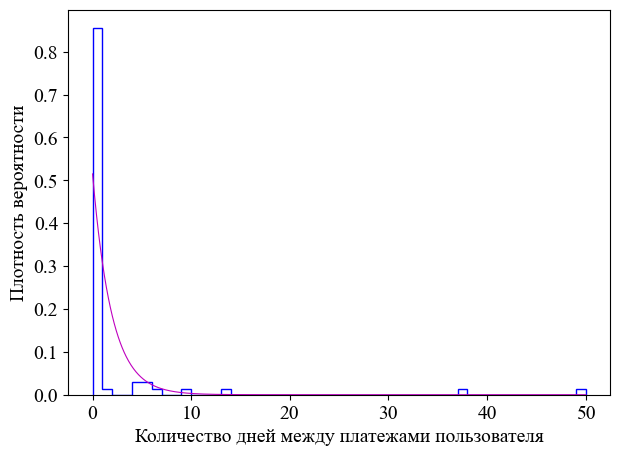

In [48]:
# Example of the distribution of time intervals between purchases by one user (the user with the most purchases)
selected_customer_index = purchases_number_over_time_D.number.idxmax()
selected_customer = purchases_number_over_time_D.loc[selected_customer_index]
selected_customer_id = selected_customer.id
filtered_df = purchases_over_time_D.query("id == @selected_customer_id").copy()

plotdata = filtered_df['difference']
timin = plotdata.min()
timax = plotdata.max()
tinum = 1001
ti = np.linspace(timin, timax, tinum)

# A prior distribution and test ONLY for example!
aprior_distr = sc.stats.expon
params = aprior_distr.fit(plotdata)
dist = aprior_distr(*params)
ks_statistic, p_value = sc.stats.kstest(plotdata, sc.stats.expon(*params).cdf)
print('p-value: ', p_value)

fig, ax = plt.subplots(figsize=(7, 5))
entries, interval_centers, patches = ax.hist(plotdata, bins=np.max(plotdata), density=True, histtype='step', color='b')
ax.plot(ti, dist.pdf(ti), color='m', lw=0.8)
ax.set(xlabel='Количество дней между платежами пользователя', ylabel='Плотность вероятности');

In [137]:
imin = purchases_number_over_time_D.index.min()
imax = purchases_number_over_time_D.index.max()
N = 10000

def boots_step(lower_bound, upper_bound, target_df, aprior_distr):
    lb, ub = lower_bound, upper_bound
    selected_customer_index = int(sc.stats.uniform(lb, ub).rvs())
    selected_customer = target_df.loc[selected_customer_index]
    selected_customer_id = selected_customer.id
    filtered_df = target_df.query("id == @selected_customer_id").copy()
    # print(filtered_df)
    time_intervals = filtered_df['difference']
    params = aprior_distr.fit(time_intervals)
    ks_statistic, p_value = sc.stats.kstest(time_intervals, aprior_distr(*params).cdf)
    return p_value

def boots_start(number_of_repeats, args):
    out = []
    for i in tqdm(range(number_of_repeats)):
        p = boots_step(*args)
        if not np.isnan(p):
            out.append(p)
            
    out = np.array(out)
    return out

In [138]:
args = [imin, imax, purchases_over_time_D, sc.stats.expon]
bootstrap_p_value_distr = boots_start(N, args)

  0%|          | 0/10000 [00:00<?, ?it/s]d:\Danis\Research\LTV-estimation\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\Danis\Research\LTV-estimation\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\Danis\Research\LTV-estimation\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\Danis\Research\LTV-estimation\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\Danis\Research\LTV-estimation\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x 

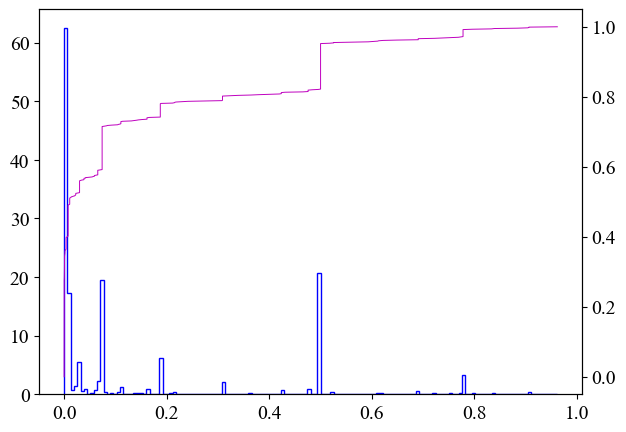

In [164]:
pv = np.linspace(0, 1, 1001)
qv = np.quantile(bootstrap_p_value_distr, pv)

fig, ax = plt.subplots(figsize=(7, 5))
axt = ax.twinx()
ax.hist(bootstrap_p_value_distr, bins=150, density=True, histtype='step', color='b');
axt.plot(qv, pv, lw=0.7, color='m')

In [173]:
# If observed p-value is lower than significance level the a priori hypothesis (exponential) can be rejected
significance_level = 0.05
confidence_level = 1 - significance_level
m = (bootstrap_p_value_distr < significance_level).sum()
n = len(bootstrap_p_value_distr)
# Hypothesis rejection probability and its confidence bounds
hypothesis_rejection_probability = m / n
confidence_for_rejection_probability = 0.9
lb = sc.stats.beta(m, n - m + 1).ppf(1-(1+confidence_for_rejection_probability)/2)
ub = sc.stats.beta(m + 1, n - m).ppf((1+confidence_for_rejection_probability)/2)

print('Estimated part of customers with rejected hypothesis of exponential distribution of time between purchases: ', hypothesis_rejection_probability)
print(f'Interval: {float(lb), float(ub)} with confidence {confidence_for_rejection_probability}', )

Estimated part of customers with rejected hypothesis of exponential distribution of time between purchases:  0.5705611390284757
Interval: (0.5586454361005877, 0.5824130029566266) with confidence 0.9


Модель BG/NBD - условие:
Покупатель следует пуассоновскому процессу с экспоненциальным распределением времени между покупками